**Experiment - 4**

After generating this data, create a training and test set. Then train the following
ML models to fit a boundary to classify the generated data:

***Perceptron Model***

***Logistic Regression Model***

Describe the decision boundary for both the models. Compute and display the
**confusion matrix** for the test data.

Repeat the exercise by generating linearly non separable data by adjusting the
cluster_std parameter. Train the same ML models.

Provide your observations.
Refer to Internet and the reference textbook for the required library calls to train
the perceptron and logistic regression models. You can use any iterative training
method.

# **Linearly Seperable Data Generation**

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

<Axes: xlabel='Feature-1', ylabel='Feature-2'>

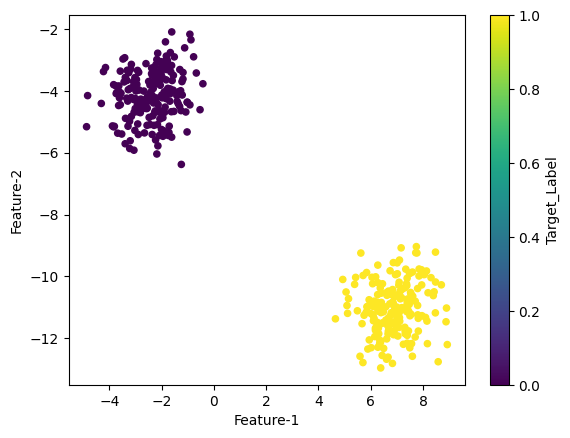

In [2]:
#Generating the dataset
data= make_blobs(n_samples=400, n_features=2, centers=2, cluster_std=0.8, center_box=(-15.0, 15.0))
x = pd.DataFrame(data[0], columns=['Feature-1', 'Feature-2'])
y = pd.DataFrame(data[1], columns=['Target_Label'])
df = pd.concat([x,y], ignore_index=True, axis=1)
df.columns = ['Feature-1', 'Feature-2', 'Target_Label']
df.plot.scatter(x = 'Feature-1', y = 'Feature-2', c='Target_Label', colormap='viridis')
#df.to_csv('dataset.csv')
#df.head()

In [3]:
#Splitting the dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
y_train= np.array(y_train).flatten()
y_test = np.array(y_test).flatten()
#y_test = np.ravel(y_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

# **Perceptron Model for Linearly Seperable Data**

**Perceptron Model**

In [4]:
model = Perceptron()
model.fit(x_train,y_train)

Perceptron()

In [5]:
y_pred_pm = model.predict(x_test)
cm_pm = confusion_matrix(y_test, y_pred_pm)
print("Confusion Matrix : \n", cm_pm)
print("Accuracy : ", accuracy_score(y_test, y_pred_pm))
#Accuracy is (TP+TN)/(FP+FN)

print(f"\nObservations:\nOut of 80,\n True Positive+True Negative = {cm_pm[0][0]}+{cm_pm[1][1]} = {cm_pm[0][0]+cm_pm[1][1]}\n False Positive+False Negative = {cm_pm[0][1]}+{cm_pm[1][0]} = {cm_pm[0][1]+cm_pm[1][0]}")

Confusion Matrix : 
 [[47  0]
 [ 0 33]]
Accuracy :  1.0

Observations:
Out of 80,
 True Positive+True Negative = 47+33 = 80
 False Positive+False Negative = 0+0 = 0


In [6]:
#Plotting the decision boundry
c = model.intercept_
m1 = model.coef_[0][0]
m2 = model.coef_[0][1]

print(f"Decision boundry line is:\ny = {c[0]} + {m1}*Feature-1 + {m2}*Feature-2")

Decision boundry line is:
y = -2.0 + 11.178194262801338*Feature-1 + 1.6389397247576718*Feature-2


In [7]:
def get_line(c,m1,m2,x1):
  x2 = -(c+(m1*x1))/m2
  return x2

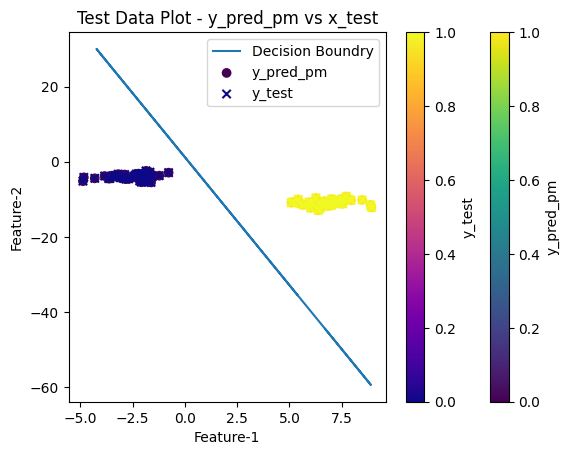

In [8]:
x2 = get_line(c,m1,m2,x_train['Feature-1'])

plt.plot(x_train['Feature-1'],x2)
plt.scatter(x=x_test['Feature-1'],y=x_test['Feature-2'],c=y_pred_pm,cmap='viridis',marker="o")
plt.colorbar(label="y_pred_pm")
plt.scatter(x=x_test['Feature-1'],y=x_test['Feature-2'],c=y_test,cmap='plasma',marker="x")
plt.colorbar(label="y_test")
plt.legend(['Decision Boundry','y_pred_pm','y_test'])
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.title('Test Data Plot - y_pred_pm vs x_test')
plt.show()

# **Logistic Regression for Linearly Seperable Data**

**Logistic Regression Model**

In [9]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [10]:
y_pred = classifier.predict(x_test)
#y_pred.shape
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm)
print("Accuracy : ", accuracy_score(y_test, y_pred))
#Accuracy is (TP+TN)/(FP+FN)

print(f"\nObservations:\nOut of 80,\n True Positive+True Negative = {cm[0][0]}+{cm[1][1]} = {cm[0][0]+cm[1][1]}\n False Positive+False Negative = {cm[0][1]}+{cm[1][0]} = {cm[0][1]+cm[1][0]}")

Confusion Matrix : 
 [[47  0]
 [ 0 33]]
Accuracy :  1.0

Observations:
Out of 80,
 True Positive+True Negative = 47+33 = 80
 False Positive+False Negative = 0+0 = 0


In [11]:
#Plotting the decision boundry
c = classifier.intercept_
m1 = classifier.coef_[0][0]
m2 = classifier.coef_[0][1]

print(f"Decision boundry line is:\ny = {c[0]} + {m1}*Feature-1 + {m2}*Feature-2")

Decision boundry line is:
y = -8.310473099633876 + 1.0581723616388565*Feature-1 + -0.7848587622177987*Feature-2


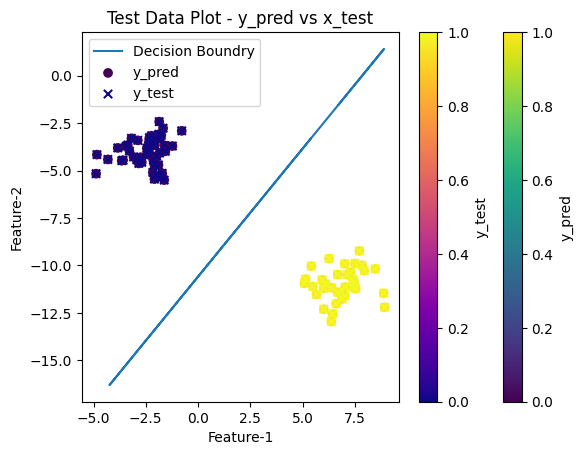

In [12]:
x2 = get_line(c,m1,m2,x_train['Feature-1'])

plt.plot(x_train['Feature-1'],x2)
plt.scatter(x=x_test['Feature-1'],y=x_test['Feature-2'],c=y_pred,cmap='viridis',marker="o")
plt.colorbar(label="y_pred")
plt.scatter(x=x_test['Feature-1'],y=x_test['Feature-2'],c=y_test,cmap='plasma',marker="x")
plt.colorbar(label="y_test")
plt.legend(['Decision Boundry','y_pred','y_test'])
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.title('Test Data Plot - y_pred vs x_test')
plt.show()

# **Linearly Non-Seperable Data Generation**

<Axes: xlabel='Feature-1', ylabel='Feature-2'>

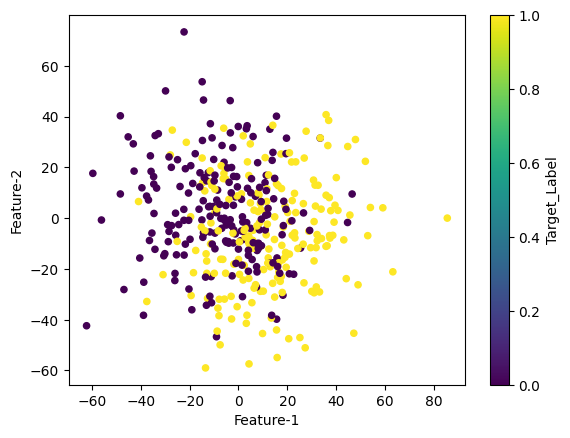

In [13]:
#Generating the dataset
data= make_blobs(n_samples=400, n_features=2, centers=2, cluster_std=20, center_box=(-15.0, 15.0))
x = pd.DataFrame(data[0], columns=['Feature-1', 'Feature-2'])
y = pd.DataFrame(data[1], columns=['Target_Label'])
df = pd.concat([x,y], ignore_index=True, axis=1)
df.columns = ['Feature-1', 'Feature-2', 'Target_Label']
df.plot.scatter(x = 'Feature-1', y = 'Feature-2', c='Target_Label', colormap='viridis')
#df.to_csv('dataset.csv')
#df.head()

In [14]:
#Splitting the dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
y_train= np.array(y_train).flatten()
y_test = np.array(y_test).flatten()
#y_test = np.ravel(y_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

# **Perceptron Model for Linearly Non-Seperable Data**

**Perceptron Model**

In [15]:
model = Perceptron()
model.fit(x_train,y_train)

Perceptron()

In [16]:
y_pred_pm = model.predict(x_test)
cm_pm = confusion_matrix(y_test, y_pred_pm)
print("Confusion Matrix : \n", cm_pm)
print("Accuracy : ", accuracy_score(y_test, y_pred_pm))
#Accuracy is (TP+TN)/(FP+FN)

print(f"\nObservations:\nOut of 80,\n True Positive+True Negative = {cm_pm[0][0]}+{cm_pm[1][1]} = {cm_pm[0][0]+cm_pm[1][1]}\n False Positive+False Negative = {cm_pm[0][1]}+{cm_pm[1][0]} = {cm_pm[0][1]+cm_pm[1][0]}")

Confusion Matrix : 
 [[16 23]
 [22 19]]
Accuracy :  0.4375

Observations:
Out of 80,
 True Positive+True Negative = 16+19 = 35
 False Positive+False Negative = 23+22 = 45


In [17]:
#Plotting the decision boundry
c = model.intercept_
m1 = model.coef_[0][0]
m2 = model.coef_[0][1]

print(f"Decision boundry line is:\ny = {c[0]} + {m1}*Feature-1 + {m2}*Feature-2")

Decision boundry line is:
y = -36.0 + -8.650151388006897*Feature-1 + -37.75515874318277*Feature-2


In [18]:
def get_line(c,m1,m2,x1):
  x2 = -(c+(m1*x1))/m2
  return x2

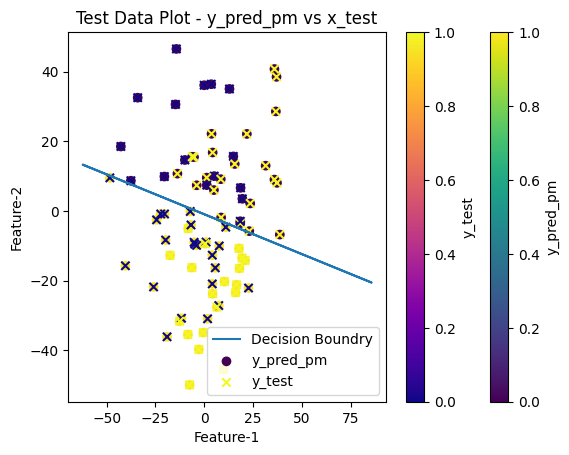

In [19]:
x2 = get_line(c,m1,m2,x_train['Feature-1'])

plt.plot(x_train['Feature-1'],x2)
plt.scatter(x=x_test['Feature-1'],y=x_test['Feature-2'],c=y_pred_pm,cmap='viridis',marker="o")
plt.colorbar(label="y_pred_pm")
plt.scatter(x=x_test['Feature-1'],y=x_test['Feature-2'],c=y_test,cmap='plasma',marker="x")
plt.colorbar(label="y_test")
plt.legend(['Decision Boundry','y_pred_pm','y_test'])
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.title('Test Data Plot - y_pred_pm vs x_test')
plt.show()

# **Logistic Regression for Linearly Non-Seperable Data**

**Logistic Regression Model**

In [20]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_pred = classifier.predict(x_test)
#y_pred.shape
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm)
print("Accuracy : ", accuracy_score(y_test, y_pred))
#Accuracy is (TP+TN)/(FP+FN)

print(f"\nObservations:\nOut of 80,\n True Positive+True Negative = {cm[0][0]}+{cm[1][1]} = {cm[0][0]+cm[1][1]}\n False Positive+False Negative = {cm[0][1]}+{cm[1][0]} = {cm[0][1]+cm[1][0]}")

Confusion Matrix : 
 [[26 13]
 [12 29]]
Accuracy :  0.6875

Observations:
Out of 80,
 True Positive+True Negative = 26+29 = 55
 False Positive+False Negative = 13+12 = 25


In [22]:
#Plotting the decision boundry
c = classifier.intercept_
m1 = classifier.coef_[0][0]
m2 = classifier.coef_[0][1]

print(f"Decision boundry line is:\ny = {c[0]} + {m1}*Feature-1 + {m2}*Feature-2")

Decision boundry line is:
y = -0.17992121292320662 + 0.048492057470774855*Feature-1 + -0.02209885512953149*Feature-2


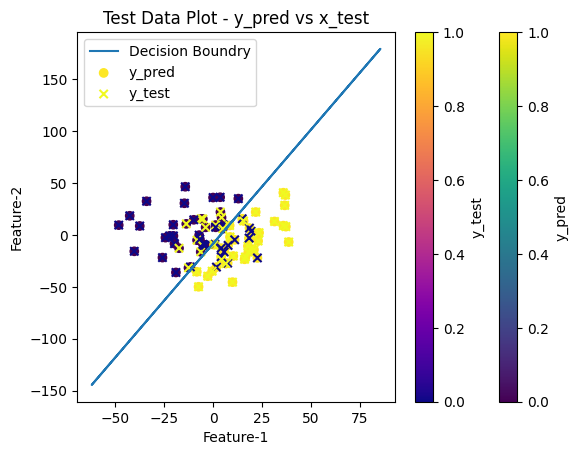

In [23]:
x2 = get_line(c,m1,m2,x_train['Feature-1'])

plt.plot(x_train['Feature-1'],x2)
plt.scatter(x=x_test['Feature-1'],y=x_test['Feature-2'],c=y_pred,cmap='viridis',marker="o")
plt.colorbar(label="y_pred")
plt.scatter(x=x_test['Feature-1'],y=x_test['Feature-2'],c=y_test,cmap='plasma',marker="x")
plt.colorbar(label="y_test")
plt.legend(['Decision Boundry','y_pred','y_test'])
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')
plt.title('Test Data Plot - y_pred vs x_test')
plt.show()